# Project 2
Nicholas Schettini and Amanda Arce

Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import networkx.algorithms.bipartite as bi

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
accidents = pd.read_csv("https://raw.githubusercontent.com/nschettini/Data-620/master/NYPD_Motor_Vehicle_Collisions_-_Crashes.csv")
accidents.head(10)

,DATE,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTINGFACTOR,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1
0,9/1/2019,NaN,NaN,NaN,NaN,NASSAU EXPRESSWAY,NaN,NaN,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4198311,Sedan
1,9/1/2019,NaN,40.673676,-73.865760,POINT (-73.86576 40.673676),SUTTER AVENUE,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN,4199346,Sedan
2,9/1/2019,NaN,40.874600,-73.909700,POINT (-73.9097 40.8746),BROADWAY,NaN,NaN,Pavement Defective,NaN,NaN,NaN,NaN,4197802,Sedan
3,9/1/2019,NaN,NaN,NaN,NaN,GRAND CENTRAL PARKWAY,UNION TURNPIKE,NaN,Unspecified,NaN,NaN,NaN,NaN,4199721,Motorcycle
4,9/1/2019,BROOKLYN,40.665245,-73.875130,POINT (-73.87513 40.665245),LINDEN BOULEVARD,ATKINS AVENUE,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,4199339,Sedan
5,9/1/2019,BRONX,NaN,NaN,NaN,EAST FORDHAM ROAD,BELMONT AVENUE,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4199427,Station Wagon/Sport Utility Vehicle
6,9/1/2019,STATEN ISLAND,40.552320,-74.190956,POINT (-74.190956 40.55232),NaN,NaN,260 ARDEN AVENUE,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4198162,Station Wagon/Sport Utility Vehicle
7,9/1/2019,NaN,40.749150,-73.988280,POINT (-73.98828 40.74915),AVENUE OF THE AMERICAS,NaN,NaN,Traffic Control Disregarded,NaN,NaN,NaN,NaN,4201656,Taxi
8,9/1/2019,BRONX,40.873394,-73.906710,POINT (-73.90671 40.873394),WEST 225 STREET,EXTERIOR STREET,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4198003,Sedan
9,9/1/2019,BRONX,40.853024,-73.884070,POINT (-73.88407 40.853024),NaN,NaN,2358 CROTONA AVENUE,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4197979,Sedan


In [3]:
records = accidents.loc[:,['COLLISION_ID', 'ON_STREET_NAME', 'CONTRIBUTINGFACTOR', 'VEHICLE TYPE CODE 1', 'LOCATION']]

In [4]:
locations = records.ON_STREET_NAME.unique()
locations = pd.DataFrame(locations,columns=['ON_STREET_NAME'])
locations['ID'] = range(7000000,7000000+len(locations))
locations[1:3]

,ON_STREET_NAME,ID
1,SUTTER AVENUE,7000001
2,BROADWAY,7000002


In [5]:
n = accidents.loc[:,['COLLISION_ID', 'ON_STREET_NAME', 'CONTRIBUTINGFACTOR', 'VEHICLE TYPE CODE 1', 'LOCATION']]
t = pd.merge(n, locations, on="ON_STREET_NAME")
t.head()

,COLLISION_ID,ON_STREET_NAME,CONTRIBUTINGFACTOR,VEHICLE TYPE CODE 1,LOCATION,ID
0,4198311,NASSAU EXPRESSWAY,Driver Inattention/Distraction,Sedan,NaN,7000000
1,4199346,SUTTER AVENUE,Unspecified,Sedan,POINT (-73.86576 40.673676),7000001
2,4199361,SUTTER AVENUE,Passing or Lane Usage Improper,Station Wagon/Sport Utility Vehicle,POINT (-73.89987 40.668682),7000001
3,4197802,BROADWAY,Pavement Defective,Sedan,POINT (-73.9097 40.8746),7000002
4,4198430,BROADWAY,Unspecified,Bike,POINT (-73.92122 40.86769),7000002


In [79]:
edgeList = t.loc[:,['COLLISION_ID', 'ID',  'CONTRIBUTINGFACTOR', 'LOCATION']]

In [80]:
accident1 = accidents.loc[:,['COLLISION_ID', 'ID',  'CONTRIBUTINGFACTOR', 'LOCATION', 'ON_STREET_NAME']]

In [81]:
# create Nodes
G = nx.Graph()

In [82]:
# create occurrence nodes
for index, row in t.iterrows():
    G.add_node(row['COLLISION_ID'],ID= row['COLLISION_ID'],case_number=row['VEHICLE TYPE CODE 1'],block=row['ON_STREET_NAME'],category='ON_STREET_NAME', bipartite=0)

In [83]:
# create Location Nodes
for index, row in locations.iterrows():
     G.add_node(row['ID'],location=row['ON_STREET_NAME'],category='LOCATION', bipartite=1)

In [84]:
#create Edges
for index, row in edgeList.iterrows():
    G.add_edge(row['ID'],row['ID'],relation = row['CONTRIBUTINGFACTOR'])

In [85]:
# create primary_type edges
for accident in accidents.CONTRIBUTINGFACTOR.unique():
    ids = accidents.loc[accidents['CONTRIBUTINGFACTOR'] == accident].COLLISION_ID
    if(len(ids) > 1):
        for val in ids:
            # get other items to create edgeList
            e = [t for t in ids  if t != val]
            # create edge
            for relation in e:
                G.add_edge(val,relation,relation = accident)

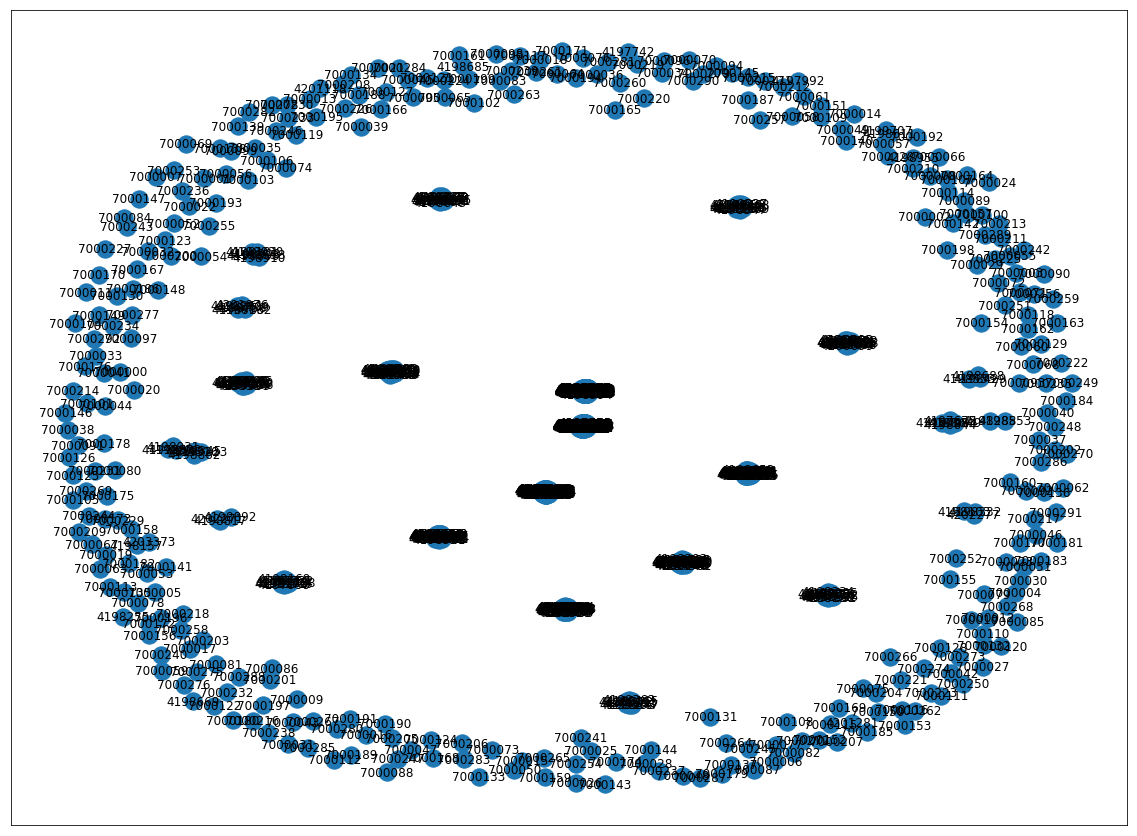

In [72]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G)
#plt.show()

In [86]:
accidentlist = t['COLLISION_ID']
locationList = locations['ID']

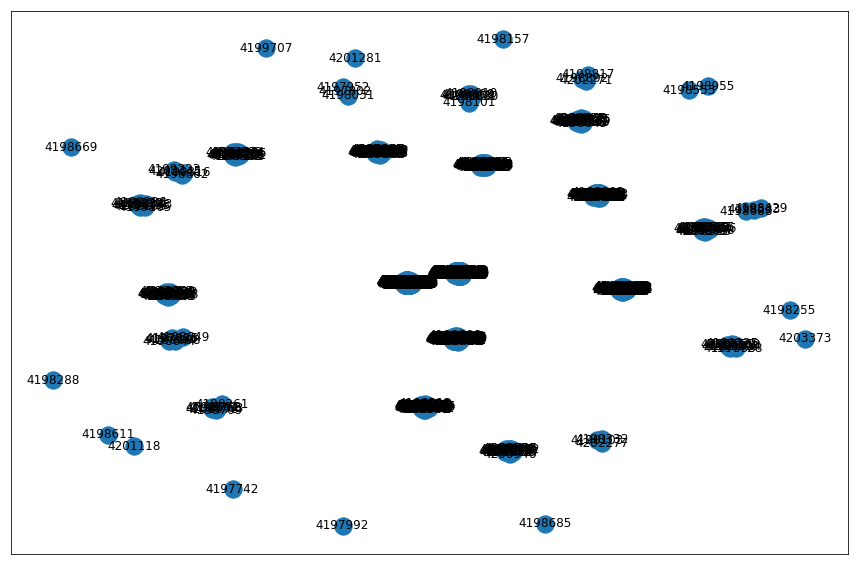

In [87]:
accidents_projected = bi.projected_graph(G, accidentlist)
plt.figure(figsize=(15,10))
nx.draw_networkx(accidents_projected,with_labels=True)
plt.show()

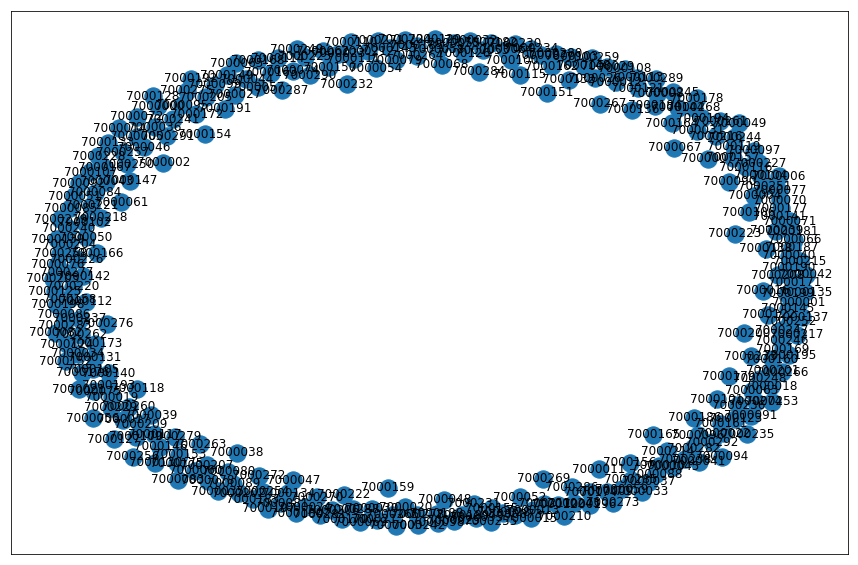

In [88]:
location_projected = bi.projected_graph(G, locationList)
plt.figure(figsize=(15,10))
nx.draw_networkx(location_projected,with_labels=True)
plt.show()

In [94]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [95]:
accident_weighted = bi.weighted_projected_graph(G, accidentlist, ratio=False)
location_weighted = bi.weighted_projected_graph(G, locationList, ratio=False)

In [102]:
accident_thresholds = island_method(accident_weighted)

In [110]:
print("threshold level, size of graph, # of connected compoents")
for i in accident_thresholds:
    print(i[0], "\t\t", len(i[1]),"\t\t", len(list(nx.connected_component_subgraphs(i[1]))))

threshold level, size of graph, # of connected compoents
1 		 573 		 19
33 		 356 		 3
65 		 301 		 2
97 		 301 		 2
129 		 301 		 2
161 		 167 		 1
